# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt 
%matplotlib inline

# Read train test data

In [2]:
# read train data
df_train=pd.read_csv('C:\\rohit\\simple\\artificial engineer\\machine-learning\\assessment\\train.csv')

In [3]:
# read test data
df_test=pd.read_csv('C:\\rohit\\simple\\artificial engineer\\machine-learning\\assessment\\test.csv')

# Explore Data

In [4]:
#print first five records
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [6]:
df_train['X0'].head()

0     k
1     k
2    az
3    az
4    az
Name: X0, dtype: object

In [7]:
# info column data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [8]:
# describe statistical parameters
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4209.0,4205.960798,2437.608688,0.00,2095.00,4220.00,6314.00,8417.00
y,4209.0,100.669318,12.679381,72.11,90.82,99.15,109.01,265.32
X10,4209.0,0.013305,0.114590,0.00,0.00,0.00,0.00,1.00
X11,4209.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
X12,4209.0,0.075077,0.263547,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...
X380,4209.0,0.008078,0.089524,0.00,0.00,0.00,0.00,1.00
X382,4209.0,0.007603,0.086872,0.00,0.00,0.00,0.00,1.00
X383,4209.0,0.001663,0.040752,0.00,0.00,0.00,0.00,1.00
X384,4209.0,0.000475,0.021796,0.00,0.00,0.00,0.00,1.00


In [9]:
df_train['y'].head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

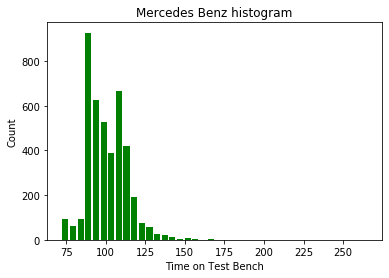

In [10]:
#Plot Histograms of Y
#Y=df_train[df_train['y']<150]
Y = df_train['y'].sort_values()
range = (0, 100) 
bins = 40
plt.hist(Y, bins, color = 'green',histtype = 'bar', rwidth = 0.8) 
  
# x-axis label 
plt.xlabel('Time on Test Bench') 
# frequency label 
plt.ylabel('Count') 
# plot title 
plt.title('Mercedes Benz histogram') 
  
# function to show the plot 
plt.show() 

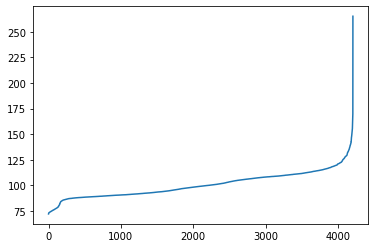

In [11]:
#plot Y
x= np.arange(0,4209,1)
plt.plot(x,Y)

In [12]:
#df_train_f=df_train[df_train['y']<150]
#df_train_f['y'].max()

# Find null values

In [13]:
#check null values
df_train.isnull().sum().T

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

# Columns with zero variance

In [14]:
#Check columns with zero variance
df_train.var()==0

ID      False
y       False
X10     False
X11      True
X12     False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 370, dtype: bool

In [15]:
# If any feature has no variance max=min, it is considered an unhelpful feature.
unhelpful_features = []
for feature in df_train:
    if max(df_train[feature]) == min(df_train[feature]):
    #if df_train[feature].var()==0:
        print(feature)
        unhelpful_features.append(feature)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X347


In [16]:
# for zero variance columns length of unique values is 1
len(np.unique(df_train['X93']))

1

In [17]:
# Drop unhelpful features
df_train = df_train.drop(unhelpful_features,1)

In [18]:
df_train['y'].head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [19]:
# Find the categorical features, which will need to be converted into dummy features.
dummies = []
for column in df_train:
    if max(df_train[column]) != 1:
        print(column)
        dummies.append(column)
print(dummies)
df_train['y'].head()

ID
y
X0
X1
X2
X3
X4
X5
X6
X8
['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [20]:
# remove ID , y to get the list of feature columns
usable_columns = list(set(dummies) - set(['ID', 'y']))
print(usable_columns)

['X6', 'X5', 'X0', 'X1', 'X4', 'X3', 'X8', 'X2']


In [21]:
# label encode categorical data in train_f dataset
label_encoder = LabelEncoder()
df_train['X0'] = label_encoder.fit_transform(df_train['X0'])
df_train['X1'] = label_encoder.fit_transform(df_train['X1'])
df_train['X2'] = label_encoder.fit_transform(df_train['X2'])
df_train['X3'] = label_encoder.fit_transform(df_train['X3'])
df_train['X4'] = label_encoder.fit_transform(df_train['X4'])
df_train['X5'] = label_encoder.fit_transform(df_train['X5'])
df_train['X6'] = label_encoder.fit_transform(df_train['X6'])
df_train['X8'] = label_encoder.fit_transform(df_train['X8'])

In [22]:
# label encode categorical data in test dataset
df_test['X0'] = label_encoder.fit_transform(df_test['X0'])
df_test['X1'] = label_encoder.fit_transform(df_test['X1'])
df_test['X2'] = label_encoder.fit_transform(df_test['X2'])
df_test['X3'] = label_encoder.fit_transform(df_test['X3'])
df_test['X4'] = label_encoder.fit_transform(df_test['X4'])
df_test['X5'] = label_encoder.fit_transform(df_test['X5'])
df_test['X6'] = label_encoder.fit_transform(df_test['X6'])
df_test['X8'] = label_encoder.fit_transform(df_test['X8'])

In [23]:
#print first five records of feature columns
df_train[usable_columns].head()
df_train['y'].head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [24]:
# find the correlation of feature columns
df_train[usable_columns].corr()

,X6,X5,X0,X1,X4,X3,X8,X2
X6,1.000000,-0.019917,0.037549,-0.079119,0.027854,-0.048468,0.018565,0.065778
X5,-0.019917,1.000000,0.012293,0.046417,0.039778,-0.008161,0.012746,-0.017722
X0,0.037549,0.012293,1.000000,-0.271123,0.017988,-0.070645,0.047735,-0.139904
X1,-0.079119,0.046417,-0.271123,1.000000,-0.020724,0.205657,-0.000306,0.088266
X4,0.027854,0.039778,0.017988,-0.020724,1.000000,0.015298,-0.008909,0.002289
X3,-0.048468,-0.008161,-0.070645,0.205657,0.015298,1.000000,-0.001249,-0.093546
X8,0.018565,0.012746,0.047735,-0.000306,-0.008909,-0.001249,1.000000,-0.069932
X2,0.065778,-0.017722,-0.139904,0.088266,0.002289,-0.093546,-0.069932,1.000000


In [25]:
df_train['X3'].value_counts()

2    1942
5    1076
0     440
3     290
6     241
4     163
1      57
Name: X3, dtype: int64

In [26]:
df_train['X4'].value_counts()

3    4205
0       2
2       1
1       1
Name: X4, dtype: int64

In [27]:
df_train['X6'].value_counts()

6     1042
9     1039
3      625
8      488
11     478
0      206
7      190
10      43
2       38
1       28
5       20
4       12
Name: X6, dtype: int64

In [28]:
#usable_columns = ['X0','X1','X2','X5','X8']

In [29]:
#df_train=df_train[df_train['y']<150]
df_train['y'].head()
df_train.max()

ID      8417.00
y        265.32
X0        46.00
X1        26.00
X2        43.00
         ...   
X380       1.00
X382       1.00
X383       1.00
X384       1.00
X385       1.00
Length: 366, dtype: float64

In [30]:
#split data into train and test(valid)
X = df_train[usable_columns]
y = df_train['y']
X_train, X_valid, y_train, y_valid = train_test_split(X,y , test_size=0.2,random_state=4242)

In [31]:
#print shape of train data
print(X_train.shape)
print(y_train.shape)

(3367, 8)
(3367,)


In [32]:
#print shape of test data
print(X_valid.shape)
print(y_valid.shape)

(842, 8)
(842,)


In [33]:
#print first five records of Y
df_train['y'].head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [34]:
#stanadarise the data
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_valid = sc.fit_transform(X_valid)

In [35]:
# find the pricipal components
n_comp = 2
pca = PCA(n_components=n_comp, random_state=42)
pca2_results_train = pca.fit_transform(X_train)
pca2_results_test = pca.transform(X_valid)

In [36]:
#for efficient use of the xgboost model , convert dataset to the DMatrix format
#Dmatrix is the data structure unique for the xgboost algorithm

d_train = xgb.DMatrix(pca2_results_train, label=y_train)
d_valid = xgb.DMatrix(pca2_results_test)

In [37]:
## Initialise a set of parameters
param = {'eta': 0.02, 'max_depth' : 4, 'objective' :'reg:linear','eval_metric': 'rmse'} ##### , 'num_class' : 0  }

In [38]:
# Train the model
xgb_model  = xgb.train(param, d_train , 20 )

[11:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[11:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


# Predict values for test data and calculte accuracy for train.csv 

In [39]:
# predict the values for test from training data
y_xgb_pred_valid = xgb_model.predict(d_valid)

In [40]:
# Calculate accuracy , Evaluate the model.
print("The test accuracy for xgb model on Mercedes Benz is :")
print("======================================================")

print(r2_score(y_valid, y_xgb_pred_valid))

The test accuracy for xgb model on Mercedes Benz is :
-31.031660151070106


In [41]:
# Calculate and print RMSE 
rmse = sqrt(mean_squared_error(y_valid, y_xgb_pred_valid))
print(rmse)

67.12722993616002


# Predict values for training data and calculte accuracy for train.csv

In [42]:
# predict the values for training from training data
y_xgb_pred_train = xgb_model.predict(d_train)

In [43]:
# Calculate accuracy , Evaluate the model for training data
print("The test accuracy for xgb model on Mercedes Benz is :")
print("======================================================")

print(r2_score(y_train, y_xgb_pred_train))

The test accuracy for xgb model on Mercedes Benz is :
-27.00535353677592


In [44]:
# Calculate and print RMSE 
rmse = sqrt(mean_squared_error(y_train, y_xgb_pred_train))
print(rmse)

68.10591284135174


# Predict Values for test data(test.csv) using Training model

In [45]:
# Test data
X_test=df_test[usable_columns]

In [46]:
# find the pricipal components for test data
n_comp = 2
pca = PCA(n_components=n_comp, random_state=42)
pca2_X_test = pca.fit_transform(X_test)
#pca2_results_test = pca.transform(X_valid)

In [47]:
# Creating DMatrices for Xgboost training with test data
d_test = xgb.DMatrix(pca2_X_test)

In [48]:
# predict the values for test data
X_test_pred = xgb_model.predict(d_test)

In [49]:
print(X_test_pred)

[26.246511 32.40275  33.45823  ... 35.043137 36.793114 32.40275 ]
